(1) I hereby agree to follow any and all assignment rules and procedures as stated in Canvas for this course, MATH2319.

(2) In particular, I solemnly swear that I will not discuss/ have not discussed my assignment solutions with anyone in any way and the solutions I am submitting are my own personal work.

Full Name: [Bodiyabaduge Dewsri Lalithi Perera]
Index Number: [s3762890]

# Assignment 1

## Question 1

## Tasks
- [Importing packages](#Importing_packages)
- [Loading the data](#Loading_the_data)
- [Handling data quality issues](#Data_quality_issues)
- [Discretizing 'A2'](#Discretizing_'A2')
- [Normalization](#Normalization)
- [Labeling the last column as 'target'](#Labeling_'target')
- [Renaming the preprocessed data set](#Renaming_dataset)
- [Saving the data set ](#Saving_dataset )


### Importing the necessary packages  
<a name="Importing_packages"></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

### Loading the data 
<a name="Loading_the_data"></a>

In [2]:
# Loading data
attributeNames = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16']

df = pd.read_csv('Assignment1_Q1_crx.data', sep=",", names = attributeNames, header = None)

df.head(10) # Checking the data set

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


In [3]:
df.shape # Checking the data set

(690, 16)

In [4]:
df.dtypes # Observing data types

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In the attribute description, 'A2' and 'A14' were described as numerical variables. Hence, the type of those attributes will be converted to numerical.

In [5]:
# Converting A2 and A14 variables to numeric
df['A2'] = pd.to_numeric(df.A2, errors='coerce')
df['A14'] = pd.to_numeric(df.A14, errors='coerce')
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object

In [6]:
# Removing extra white space in categorical columns
categorical_cols = df.columns[df.dtypes == np.object].tolist()
for col in categorical_cols:
    df[col] = df[col].str.strip()

### Handling data quality issues 
<a name="Data_quality_issues"></a>
Detecting outliers and unusual values using descriptive statistics.

In [7]:
df.describe(include = np.object) # Categorical variables - summary statistics

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16
count,690,690,690,690,690,690,690,690,690,690
unique,3,4,4,15,10,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


Acording to the attribute information in crx.names, some attributes should have fewer unique categories rather than the table above (i.e the original data set). Eg: 'A1'- 2 categories, etc.

In [8]:
df.describe(include = np.number).round(2) # Numerical variables  - summary statistics

,A2,A3,A8,A11,A14,A15
count,678.00,690.00,690.00,690.00,677.00,690.00
mean,31.57,4.76,2.22,2.40,184.01,1017.39
std,11.96,4.98,3.35,4.86,173.81,5210.10
min,13.75,0.00,0.00,0.00,0.00,0.00
25%,22.60,1.00,0.16,0.00,75.00,0.00
50%,28.46,2.75,1.00,0.00,160.00,5.00
75%,38.23,7.21,2.62,3.00,276.00,395.50
max,80.25,28.00,28.50,67.00,2000.00,100000.00


In [9]:
df.isna().sum() # Number of missing values before assigning outliers of categorical variables as missing values

A1      0
A2     12
A3      0
A4      0
A5      0
A6      0
A7      0
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [10]:
df['A4'].value_counts()  #A4-?, A5-?, A6-?, A7?

u    519
y    163
?      6
l      2
Name: A4, dtype: int64

#### Relabelling unusual values ('?') as missing values.

In [11]:
df.replace(['?'], np.nan, inplace=True) # Setting '?' to missing values(NaN) - Categorical data
df.isna().sum()
#df.nunique(dropna=True) # New count of unique values

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

#### Outliers in numerical Variables

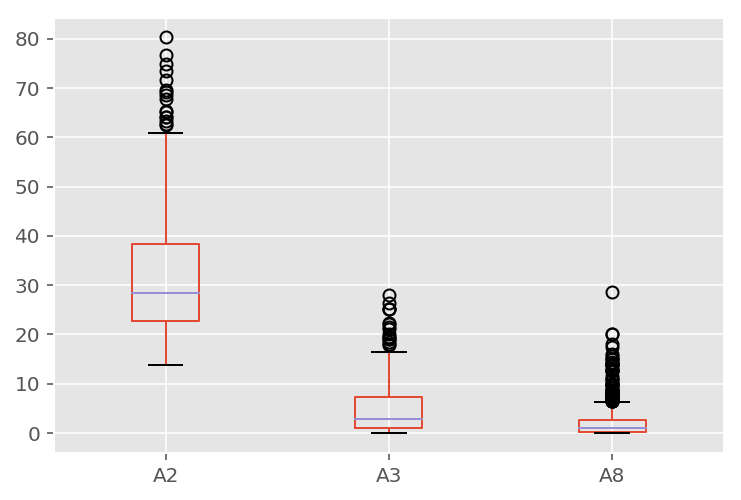

In [12]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

df.boxplot(column=['A2','A3','A8']);

The above boxplots depicts considerable amount of outliers (>5%). Since these attributes are anonimous, the outliers will be kept without any change.

#### Imputing missing values

- Missing values in categorical variables will be imputted with mode of the variable.
- Missing values in numerical variables will be imputted with median of the variable, as median is not sensitive to the outliers. If we use mean for the imputation, it will change the distribution of the variable.

In [13]:
df_A = df.copy()

categorical_cols = df_A.columns[df_A.dtypes == np.object].tolist()
numerical_cols = df_A.columns[df_A.dtypes == np.number].tolist()

for col in categorical_cols:
     df_A[col] = df_A[col].fillna(value = df_A[col].mode()[0]) # Mode imputation to categorical missing values

for col in numerical_cols:
    df_A[col] = df_A[col].fillna(df_A[col].median()) # Median imputation to numerical missing values

df_A.isna().sum() # Checking the null value count of the imputed data frame

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

### Discretizing 'A2' 
<a name="Discretizing_'A2'"></a>

In [14]:
df_copy= df_A.copy() #Copying the imputed data frame

df_copy['A2'] = pd.qcut(df_copy['A2'], q=3, labels=['law', 'medium', 'high']) # Discretizing 'A2' via equal-frequency binning with 3 bins
df_copy['A2'].value_counts()

medium    231
law       230
high      229
Name: A2, dtype: int64

In [15]:
#Integer encoding
level_mapping = {'law': 0, 'medium': 1, 'high': 2}
df_copy['A2'] = df_copy['A2'].replace(level_mapping)
df_copy.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,1,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0,+
1,a,2,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560,+
2,a,1,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824,+
3,b,1,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3,+
4,b,0,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0,+
5,b,1,4.000,u,g,m,v,2.500,t,f,0,t,g,360.0,0,+
6,b,1,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285,+
7,a,0,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349,+
8,b,2,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314,+
9,b,2,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442,+


### Normalization - Standard scaling 
<a name="Normalization"></a>

In [16]:
Data_scaler = preprocessing.StandardScaler()

df_norm = df_copy.copy()
numerical_cols = df_norm.select_dtypes(include=np.number)

for col in numerical_cols: # Only the numerical attributes can be normalized
    df_norm[col] = pd.DataFrame(Data_scaler.fit_transform(pd.DataFrame(df_norm[col])),columns=[col])

df_norm.describe(include = np.number).round(2)

,A2,A3,A8,A11,A14,A15
count,690.00,690.00,690.00,690.00,690.00,690.00
mean,-0.00,0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.22,-0.96,-0.66,-0.49,-1.07,-0.20
25%,-1.22,-0.76,-0.62,-0.49,-0.60,-0.20
50%,0.00,-0.40,-0.37,-0.49,-0.14,-0.19
75%,1.23,0.49,0.12,0.12,0.51,-0.12
max,1.23,4.67,7.86,13.29,10.56,19.01


### Labeling the last column as 'target' 
<a name="Labeling_'target'"></a>

In [17]:
df_final = df_norm.copy()
df_final = df_final.rename({'A16':'target'}, axis = 1)

### Renaming the preprocessed data set and checking the summary 
<a name="Renaming_dataset"></a>

In [18]:
df_clean = df_final.copy()
df_clean.shape
df_clean.describe(include='all').round(3) 
df_clean.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
0,b,0.001777,-0.956613,u,g,w,v,-0.291083,t,t,-0.288101,f,g,0.107155,-0.195413,+
1,a,1.227857,-0.060051,u,g,q,h,0.244190,t,t,0.740830,f,g,-0.816912,-0.087852,+
2,a,0.001777,-0.856102,u,g,q,h,-0.216324,t,f,-0.493887,f,g,0.560471,-0.037144,+
3,b,0.001777,-0.647038,u,g,w,v,0.456505,t,t,0.535044,t,g,-0.485643,-0.194837,+
4,b,-1.224303,0.174141,u,g,w,v,-0.153526,t,f,-0.493887,f,s,-0.369408,-0.195413,+


### Saving the data set as a csv file 
<a name="Saving_dataset"></a>

In [19]:
df_clean.to_csv('df_clean.csv',index = False, header=True)




## Question 2

## Tasks
- [Loading the data](#Loading_data)
- [Constructing KNN algorithm](#Constructing_KNN_algorithm)

    a. [3-nearest neighbor prediction for CPI Value](#3-NN_prediction)

    b. [Weighted k-NN with k=16](#Weighted_16-NN)

    c. [Predicting with normalized data](#Predicting_with_normalized_data)

    d. [Weighted k-NN with k=16 for normalized data](#Weighted_16-NN_normalized_data)

    e. [Conclusions](#Conclusions)

### Loading data <a name="Loading_Data"></a>

In [20]:
df= pd.read_csv("Asignment1_Q2.csv")
df.shape

(17, 7)

In [21]:
df

,COUNTRY_ID,LIFE_EXP,TOP10_INCOME,INFANT_MORT,MIL_SPEND,SCHOOL_YEARS,CPI
0,Afghanistan,59.61,23.21,74.3,4.44,0.4,1.5171
1,Haiti,45.00,47.67,73.1,0.09,3.4,1.7999
2,Nigeria,51.30,38.23,82.6,1.07,4.1,2.4493
3,Egypt,70.48,26.58,19.6,1.86,5.3,2.8622
4,Argentina,75.77,32.30,13.3,0.76,10.1,2.9961
5,China,74.87,29.98,13.7,1.95,6.4,3.6356
6,Brazil,73.12,42.93,14.5,1.43,7.2,3.7741
7,Israel,81.30,28.80,3.6,6.77,12.5,5.8069
8,U.S.A,78.51,29.85,6.3,4.72,13.7,7.1357
9,Ireland,80.15,27.23,3.5,0.60,11.5,7.536


In [22]:
df.dtypes

COUNTRY_ID       object
LIFE_EXP        float64
TOP10_INCOME    float64
INFANT_MORT     float64
MIL_SPEND       float64
SCHOOL_YEARS    float64
CPI              object
dtype: object

In [23]:
df['CPI'] = pd.to_numeric(df.CPI, errors='coerce')
df.dtypes

COUNTRY_ID       object
LIFE_EXP        float64
TOP10_INCOME    float64
INFANT_MORT     float64
MIL_SPEND       float64
SCHOOL_YEARS    float64
CPI             float64
dtype: object

In [24]:
df.describe()

,LIFE_EXP,TOP10_INCOME,INFANT_MORT,MIL_SPEND,SCHOOL_YEARS,CPI
count,17.000000,17.000000,17.000000,17.000000,17.000000,16.000000
mean,73.131765,29.952941,19.929412,2.184706,9.605882,5.725750
std,11.207660,7.078027,27.570019,1.765103,4.238288,2.917551
min,45.000000,22.070000,2.400000,0.090000,0.400000,1.517100
25%,70.480000,25.400000,4.200000,1.130000,6.400000,2.962625
50%,78.510000,28.490000,6.300000,1.430000,11.500000,6.471300
75%,80.670000,31.680000,14.500000,2.590000,12.800000,8.202700
max,82.090000,47.670000,82.600000,6.770000,14.200000,9.462700


The data set is considered to be a cleaned data set. In this question Corruption Perception Index (CPI) will be treated as the 'target' variable. Trainig data set is contains 16 data points (16 countries) and the test data set contains only 1 data point.



### Constructing KNN algorithm  
<a name="Constructing_KNN_algorithm"></a>
The algorithm will be developed in three steps(functions);
1. Function to compute Manhattan distance of two given points
2. Function to find the nearest k neighbours
3. Function to predict the target value using the k nearest neighbours

This function is defined to predict continuous target, hence the target column is required to have the format 'float'

In [25]:
# Function to compute Manhettan Distance between two points
def manhattan_distance(row1, row2):
    
    distance = 0.0
    
    for i in range(len(row1)-1): # Calculating distances among features, excluding target feature
        distance += np.abs(row1[i] - row2[i])
    
    return (distance)

In [26]:
# Function to pick the k nearest neighbours
def k_nearest_points(train, test, k):

    target_distance = list()
    
    for train_row in train: # Calculating distances to all the points in the trainig data set
        dist = manhattan_distance(test, train_row) 
        target_distance.append((train_row[-1], dist)) # A list of CPI value and the corresponding distance
    
    target_distance.sort(key=lambda x: x[1]) # sorting the distances list by distance
    
    neighbors = list()
    
    for i in range(k):    # Selecting the nearest k neighbours
        neighbors.append(target_distance[i])
    
    return neighbors # returns a list of k number of elements in (CPI, distance) format

In [27]:
def predict_CPI(train, test, k, weighted= False):
    
    neighbors = k_nearest_points(train, test, k)  # k nearest neighbours' CPI values
    
    CPI_sum = 0
    
    if not weighted : # calculating the average CPI of the k nearest neighbours
        for i in range(k):
            CPI_sum += neighbors[i][0]
            
        prediction = CPI_sum/k 
        
    else: # calculating the weighted average CPI of the k nearest neighbours
        weight_sum = 0
        
        for i in range(k):
            CPI_sum += (neighbors[i][0]/neighbors[i][1]) # sum by weighting scheme of the reciprocal
            weight_sum += (1/neighbors[i][1])
            
        prediction = CPI_sum/weight_sum
        
    return prediction

In [28]:
# Creating training and testing data sets (matrix format)
df_features = df.drop(['COUNTRY_ID'],axis=1) # Selecting the feature set, including the target feature

mat = df_features.as_matrix()
train = np.delete(mat, -1, axis=0)
test = mat[-1, :]

### (a) 3-nearest neighbor prediction for CPI Value 
<a name="3-NN_prediction"></a>

In [29]:
a_neighbours = k_nearest_points(train, test, 3)
a = predict_CPI(train, test, 3)

print('CPIs and distances of the 3 nearest neighbours:\n' , a_neighbours)
print()
print('Predicted CPI:' , a.round(2)) 

CPIs and distances of the 3 nearest neighbours:
 [(2.9961, 17.97999999999999), (7.1357, 18.069999999999993), (3.6356, 21.07)]

Predicted CPI: 4.59


### (b) Weighted k-NN with k=16  <a name="Weighted_16-NN"></a>

In [30]:
b_neighbours = k_nearest_points(train, test, 16)
b = predict_CPI(train, test, 16, True)

print('CPIs and distances of the 16 nearest neighbours:\n' , b_neighbours)
print()
print('Predicted CPI:' , b.round(2)) 

CPIs and distances of the 16 nearest neighbours:
 [(2.9961, 17.97999999999999), (7.1357, 18.069999999999993), (3.6356, 21.07), (7.7751, 22.64), (9.4627, 25.36), (5.8069, 26.25999999999999), (2.8622, 27.17), (7.5360000000000005, 28.15), (8.6725, 29.109999999999992), (3.7741, 29.39), (8.8442, 29.96), (8.0461, 32.18999999999999), (9.2985, 33.61000000000001), (1.5171, 93.85), (2.4493, 107.07), (1.7999, 114.99000000000001)]

Predicted CPI: 6.16


### (c)  Predicting with normalized data <a name="Predicting_with_normalized_data"></a>

#### Normalizing the feature set

To model the Corruption Perception Index (CPI), all the numerical attributes will be considered as features. All of these variables will be normalized using range normalizing method. 

In [31]:
df_Normalized = df.copy()
Data_scaler = preprocessing.MinMaxScaler() 

features = ['LIFE_EXP','TOP10_INCOME','INFANT_MORT','MIL_SPEND','SCHOOL_YEARS']

for col in features: # All the features will be normalized
     df_Normalized[col] = pd.DataFrame(Data_scaler.fit_transform(pd.DataFrame(df_Normalized[col])),columns=[col])

df_Normalized.describe(include = np.number).round(2)

,LIFE_EXP,TOP10_INCOME,INFANT_MORT,MIL_SPEND,SCHOOL_YEARS,CPI
count,17.00,17.00,17.00,17.00,17.00,16.00
mean,0.76,0.31,0.22,0.31,0.67,5.73
std,0.30,0.28,0.34,0.26,0.31,2.92
min,0.00,0.00,0.00,0.00,0.00,1.52
25%,0.69,0.13,0.02,0.16,0.43,2.96
50%,0.90,0.25,0.05,0.20,0.80,6.47
75%,0.96,0.38,0.15,0.37,0.90,8.20
max,1.00,1.00,1.00,1.00,1.00,9.46


In [32]:
df_features = df_Normalized.drop(['COUNTRY_ID'],axis=1) # Selecting the feature set, including the target feature

mat_N = df_features.as_matrix()
train_N = np.delete(mat_N, -1, axis=0)
test_N = mat_N[-1, :]


c_neighbours = k_nearest_points(train_N, test_N, 3)
c = predict_CPI(train_N, test_N, 3)

print('CPIs and distances of the 3 nearest neighbours:\n' , c_neighbours)
print()
print('Predicted CPI:' , c.round(2)) 

CPIs and distances of the 3 nearest neighbours:
 [(7.1357, 0.5964456993198056), (7.7751, 0.7295071755018734), (2.9961, 0.9535690730073549)]

Predicted CPI: 5.97


### (d) Weighted k-NN with k=16 for normalized data <a name="Weighted_16-NN_normalized_data"></a>

In [33]:
d_neighbours = k_nearest_points(train_N, test_N, 16)
d = predict_CPI(train_N, test_N, 16, True)

print('CPIs and distances of the 16 nearest neighbours:\n' , d_neighbours)
print()
print('Predicted CPI:' , d.round(2)) 

CPIs and distances of the 16 nearest neighbours:
 [(7.1357, 0.5964456993198056), (7.7751, 0.7295071755018734), (2.9961, 0.9535690730073549), (9.4627, 1.0202676580236605), (5.8069, 1.0242503119521613), (3.6356, 1.066451033013447), (8.8442, 1.1101112920312999), (8.6725, 1.154175534494832), (7.5360000000000005, 1.1836726475145292), (9.2985, 1.2346623332602191), (8.0461, 1.2451423683688687), (2.8622, 1.2476520724853433), (3.7741, 1.4221637382585248), (1.5171, 2.339692629195873), (2.4493, 2.6579499033757235), (1.7999, 3.2755343668873644)]

Predicted CPI: 6.29


### (e) Conclusions <a name="Conclusions"></a>



Scenario| Dataset       | k   | Weighted average |Predicted CPI |
--------| :-----------: |:---:| :---------------:|---------------:|
a       | Raw           | 3   | False            |4.59            |
b       | Raw           | 16  | True             |6.16            |
c       | Normalized    | 3   | False            |5.97            |
d       | Normalized    | 16   | True            |6.29            |
Actual  | N/A.          | N/A  | N/A              |2.4488          |



- According to the results the scenario a depicts the closest CPI to the actual CPI. Hence, it can be taken as the most accurate CPI.

- When k=3, it can be noted that the prediction is more accurated, when k=16 the algorithm starts taking into account neighbors that are far away from the test instance in the feature space. As a result, the algorithm tends toward the general average of CPI value.

- From the above results it is hard to capture the effect of weighing by reciprocal of Manhattan distance, as it was applied only on k=16 scenario.

- Raw data set has generated more accurate results when compared to normalized data.

